# Aula 4



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

# uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv('enem_2018.csv')
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,...,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,...,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,...,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,...,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,...,A,B,A,A,D,B,B,B,A,A


In [2]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [3]:
colunas_presenca = ['TP_PRESENCA_CN','TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [4]:
dados[colunas_presenca].groupby(['TP_PRESENCA_CN', 'TP_PRESENCA_MT', 'TP_PRESENCA_CH','TP_PRESENCA_LC']).count()

Empty DataFrame
Columns: []
Index: [(0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 1.0, 1.0), (0.0, 0.0, 2.0, 2.0), (1.0, 1.0, 0.0, 0.0), (1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 2.0, 2.0), (2.0, 2.0, 1.0, 1.0)]

> 0 - Faltou <br> 
> 1 - Presente <br>
> 2 - Eliminado

• Prova de CN ocorreu no mesmo dia da de MT <br>
• CH com LC

In [5]:
dados.query('TP_PRESENCA_CN==2 | TP_PRESENCA_CN==0')['NU_NOTA_CN'].unique()

array([nan])

In [6]:
dados.query('TP_PRESENCA_CH==2 | TP_PRESENCA_CH==0')['NU_NOTA_CH'].unique()

array([nan])

In [7]:
dados[colunas_notas] = dados[colunas_notas].fillna(value=0.0)

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

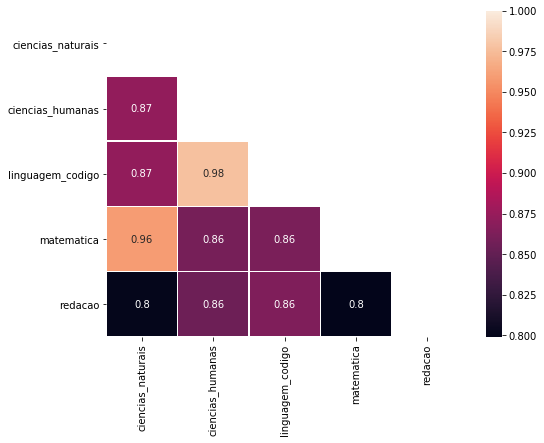

In [8]:
corr = dados[colunas_notas].corr()
corr.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
corr.index = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
masc = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, mask=masc, linewidths=.5)
plt.show()

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [9]:
colunas_acerto = [
    'NU_INSCRICAO', 'TP_LINGUA', 'NU_NOTA_REDACAO',
    'TX_RESPOSTAS_CN', 'TX_GABARITO_CN',
    'TX_RESPOSTAS_MT', 'TX_GABARITO_MT',
    'TX_RESPOSTAS_CH', 'TX_GABARITO_CH',
    'TX_RESPOSTAS_LC', 'TX_GABARITO_LC'                 
]

In [10]:
dados_acertos = dados[colunas_acerto]
dados_acertos.sample(10)

,NU_INSCRICAO,TP_LINGUA,NU_NOTA_REDACAO,TX_RESPOSTAS_CN,TX_GABARITO_CN,TX_RESPOSTAS_MT,TX_GABARITO_MT,TX_RESPOSTAS_CH,TX_GABARITO_CH,TX_RESPOSTAS_LC,TX_GABARITO_LC
87157,180008311225,1,580.00,ACBEEDCDDECABDDCCABECBAAEEDDACAABEACEACCBBABE,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,ABEACBDDBAEDBCEAECBDDCBABDBECECCBBCEEBCCBEAEC,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,ADEBDCDCDABBBCCBACEDECADACEEDEEAEBBBAACDDECAC,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,99999CBADBCBEBCBDCBEECDCEDBAEAAEADEDCEBBBCDCBA...,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...
50339,180011599857,1,580.00,ACDDCACDABCBBACBABCEDCCDDABECDCBBADCBCABDEBDC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,ECAEDBCDECAEAECAAEDABCDEEBECABDCCCADADBADCAEE,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,ABDECCADBCBEEDBADCBBECCABDEDCAACBBECAECADBCDB,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,99999BCBABAECDCBCCADEAECCABDBDAAEEDAAEACCBDCAE...,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...
79441,180007457875,1,0.00,EAEBABABDBCBEBBCEADCACBDAEBEBAEDABABEBAEDCEBC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,BAECDBAADECCBBDDACEBCACEDAEBCACDCEBACBDBBDACE,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,CEDBACABEDCDEBDECACADABDAEEABDCADECACDACEBCEB,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,99999ADBDAACEBCBDCCEAADACCBDACABAECDBECAAECDCB...,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...
96297,180010124387,1,620.00,BEEAECCDADDBCAEBDEADBCABDBDEDBBBCBDAACDCDEABD,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CBBEEDEBDCABCDEEBCDDEDCDCEDBCDEACCAABDBDCDCAA,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,DEBEDBDEABCEADCCADCBACCDBDCEBAAEDCBCDAACBAABE,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,99999DDEBCABCEDCBACBDEEBCBEDACADBCEBAEABCDACEB...,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...
87332,180010689452,1,0.00,DDBBDBBCCDCDBADBCCDBDBBDDCCDDEBDBBDCBDDBCADBD,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,DDAADDABDCBBDDBBBDBDBBDDCBDDDBBDCDBCDDBDBDCAD,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,BACBCCABCBCDBCBDBCDBCBDCBCEBBACBBCCDBDCCBCBAC,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,99999EDBBCBDCEBCDBDBCCBCBCACCCABCCBCABBCBBCBCA...,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...
9682,180007777944,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32906,180007900216,1,340.00,BCDBDACABCDADCCBACBDBCEEAABDBCABBECCDDBDADBCB,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,EDCACBECACABDBBDEBAADCDBDBCDBCECDBBCBDBDACBAE,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,CCBBCDDDBBAECBDCEADAEDDAAEABECADCEDCDBEAADDEA,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,99999ABEEBDAAEBDBADABECDABADBCDACDEDCDAAAACBCB...,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...
87484,180009612371,0,320.00,EBEDADDDACBADCDBBDDEACCADEBDBADAEBACABBBDDBBA,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,BBAACBEDBDADCDBAABADBDDCACAEABBAEDBABECCBCDEA,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,CABACACBADBEEBDDCBCDECCBEDDCBABDACEBBCBCAEBAC,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBAEC99999ABADEABABCEAADACDABBDBABADADCAAEDDAB...,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...
64920,180008871334,0,360.00,BADEADBADDEAAADECDCCDEEEADAACEEEAEBACCDCACCCD,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,BDAAECADBDEAACDDABBCEBBBBEDDCEEEDABDBDCABBACA,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,EAACCEEBBAAADCEADEACCAAEBEAEEDCBABABABCAEEEBD,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,CEBDC99999ADEEDEBDABBBBCBBAACACDABBBBEDDAEDACD...,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...
25097,180009828111,1,560.00,DABCEECACBBAAEDABABACEBBADCEDABCCECACACEBEEBB,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,EBBAEEACBBBCEEDBBECEDBABBBEADEADEABABEBDBACAB,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,ACDCEECAD.DCBCDEECEDDACEBEEEDCCAAEEDAECABCEBC,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,99999ACBDBEBEEDECAADDECACCBAAACACBDAECBDAECCAD...,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...


### Sobre os dados


CN, CH e MT • As 45 primeiras posições deste campo são referentes ao respectivo gabarito
> A,B,C,D, E, * (dupla marcação), . (em branco)
> Tamanho do campo: GABARITO 45 / RESPOSTA 45
>> As 45 primeiras posições deste campo são referentes as respectivas respostas. O asterisco (*) indica dupla marcação e o ponto (.) resposta em branco.

LC • As 50 primeiras posições deste campo são referentes ao respectivo gabarito, das quais, para as 10 primeiras, as 5 primeiras correspondem à prova de Lingua Inglesa e as outras 5 à prova de Lingua Espanhola.
> A,B,C,D, E, * (dupla marcação), . (em branco), 9 (Item não apresentado)
<br>
> Tamanho do campo: GABARITO 50 / RESPOSTA 45
>> As 45 primeiras posições deste campo são referentes as respectivas respostas, das quais as 5 primeiras correspondem a parte de língua estrangeira. O asterisco (*) indica dupla marcação e o ponto (.) resposta em branco.

TP_LINGUA
> 0 - Inglês <br>
> 1 - Espanhol

In [11]:
dados_acertos.groupby('TP_LINGUA').count()['NU_INSCRICAO']

TP_LINGUA
0    64330
1    73514
Name: NU_INSCRICAO, dtype: int64

In [12]:
dados_acertos.shape

(137844, 11)

In [13]:
dados_acertos = dados_acertos.dropna()
dados_acertos.shape

(97270, 11)

In [14]:
137844 - 97270

40574

In [15]:
40574 / 137844

0.29

In [16]:
dados_acertos.head()

,NU_INSCRICAO,TP_LINGUA,NU_NOTA_REDACAO,TX_RESPOSTAS_CN,TX_GABARITO_CN,TX_RESPOSTAS_MT,TX_GABARITO_MT,TX_RESPOSTAS_CH,TX_GABARITO_CH,TX_RESPOSTAS_LC,TX_GABARITO_LC
1,180012890374,0,680.00,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...
2,180008223824,1,600.00,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...
3,180007859645,0,400.00,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...
6,180009943059,1,560.00,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...
8,180008290373,0,660.00,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...


In [17]:
def acertos(df, column1, column2):
    resp = df[column1]
    gab = df[column2]
    acertos = ([sum(1 for rr, gg in zip(r,g) if rr == gg) for r, g in zip(resp, gab)])
    return acertos

In [18]:
#acertos(dados_acertos, 'TX_RESPOSTAS_CN', 'TX_GABARITO_CN')

In [19]:
print(dados_acertos['TX_GABARITO_LC'].apply(lambda l: len(l)).unique())
print(dados_acertos['TX_RESPOSTAS_LC'].apply(lambda l: len(l)).unique())

[50]
[50]


In [20]:
dados_acertos['ACERTOS_CN'] = acertos(dados_acertos, 'TX_RESPOSTAS_CN', 'TX_GABARITO_CN')
dados_acertos['ACERTOS_CH'] = acertos(dados_acertos, 'TX_RESPOSTAS_CH', 'TX_GABARITO_CH')
dados_acertos['ACERTOS_LC'] = acertos(dados_acertos, 'TX_RESPOSTAS_LC', 'TX_GABARITO_LC')
dados_acertos['ACERTOS_MT'] = acertos(dados_acertos, 'TX_RESPOSTAS_MT', 'TX_GABARITO_MT')

In [21]:
dados_acertos.head()

,NU_INSCRICAO,TP_LINGUA,NU_NOTA_REDACAO,TX_RESPOSTAS_CN,TX_GABARITO_CN,TX_RESPOSTAS_MT,TX_GABARITO_MT,TX_RESPOSTAS_CH,TX_GABARITO_CH,TX_RESPOSTAS_LC,TX_GABARITO_LC,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC,ACERTOS_MT
1,180012890374,0,680.00,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,11,27,33,22
2,180008223824,1,600.00,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,8,9,8,6
3,180007859645,0,400.00,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,7,10,11,10
6,180009943059,1,560.00,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,11,9,15,8
8,180008290373,0,660.00,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,8,12,15,13


In [22]:
dados_plot = dados_acertos.drop(columns=colunas_acerto)
dados_plot['NOTA_REDACAO'] = dados_acertos['NU_NOTA_REDACAO']

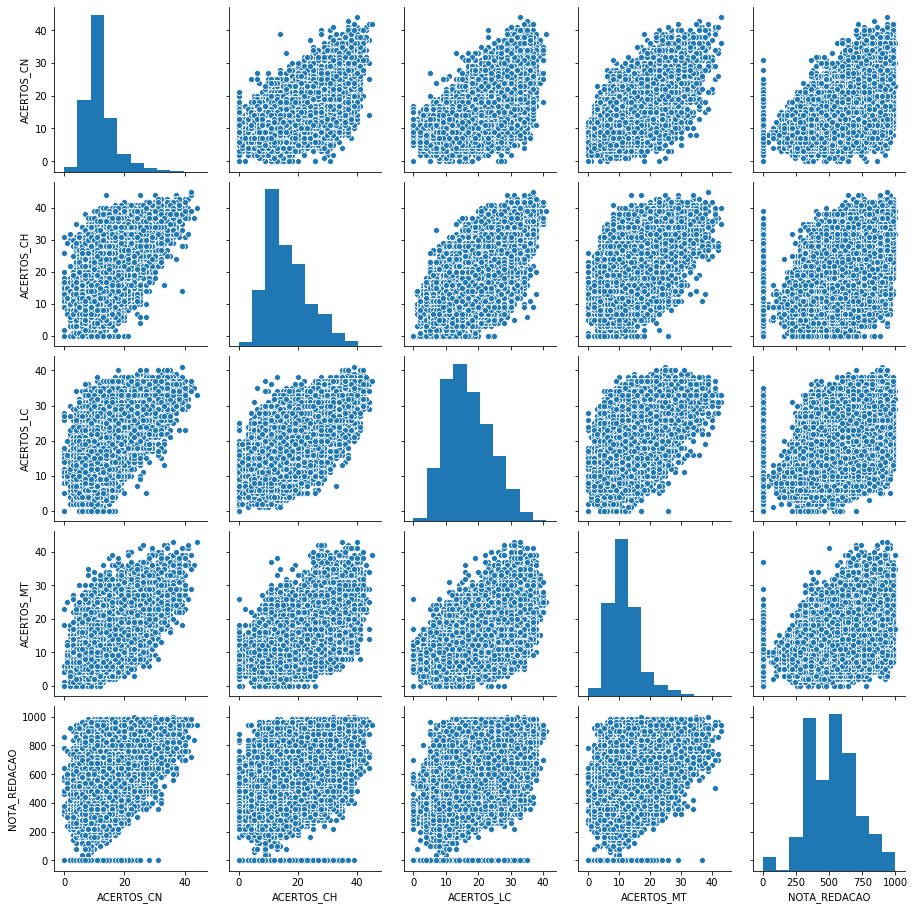

In [23]:
sns.pairplot(dados_plot)

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

> cada prova possui um modelo, não sabemos o que muda em cada modelo, podendo ser a ordem da questão ou apenas os números, etc. Talvez uma analise melhor, seria analisar por modelo

In [24]:
colunas_modelo = colunas_acerto.copy()
colunas_modelo.extend(['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT'])
colunas_modelo

['NU_INSCRICAO',
 'TP_LINGUA',
 'NU_NOTA_REDACAO',
 'TX_RESPOSTAS_CN',
 'TX_GABARITO_CN',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_MT',
 'TX_RESPOSTAS_CH',
 'TX_GABARITO_CH',
 'TX_RESPOSTAS_LC',
 'TX_GABARITO_LC',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [25]:
dados_modelo= dados[colunas_modelo].dropna()

In [26]:
dados_modelo.groupby('CO_PROVA_CN').count()['NU_INSCRICAO']

CO_PROVA_CN
447.00    24384
448.00    24270
449.00    24312
450.00    24239
463.00        7
467.00       58
Name: NU_INSCRICAO, dtype: int64

In [27]:
dados_modelo.groupby('CO_PROVA_CH').count()['NU_INSCRICAO']

CO_PROVA_CH
451.00    24526
452.00    24123
453.00    24255
454.00    24277
464.00        7
468.00       58
491.00        6
492.00        5
493.00        6
494.00        7
Name: NU_INSCRICAO, dtype: int64

In [28]:
def acertos_questoes(l):
    resp = l[0]
    gab = l[1]
    acertos = ([sum(1 for rr, gg in zip(r,g) if rr == gg) for r, g in zip(resp, gab)])
    return acertos

In [29]:
model_CN = list(dados_acertos[['TX_RESPOSTAS_CN', 'TX_GABARITO_CN']].apply(acertos_questoes, axis=1))
df_CN = pd.DataFrame(model_CN).sum() / len(model_CN)

In [30]:
model_MT = list(dados_acertos[['TX_RESPOSTAS_MT', 'TX_GABARITO_MT']].apply(acertos_questoes, axis=1))
df_MT = pd.DataFrame(model_MT).sum() / len(model_MT)

In [31]:
model_CH = list(dados_acertos[['TX_RESPOSTAS_CH', 'TX_GABARITO_CH']].apply(acertos_questoes, axis=1))
df_CH = pd.DataFrame(model_CH).sum() / len(model_CH)

In [32]:
model_LC = list(dados_acertos[['TX_RESPOSTAS_LC', 'TX_GABARITO_LC']].apply(acertos_questoes, axis=1))
df_LC = pd.DataFrame(model_LC).sum() / len(model_LC)

In [39]:
X = pd.DataFrame([df_CN, df_MT, df_CH, df_LC])
X.index = ['Ciências Naturais', 'Matemática', 'Ciências Humanas', 'Linguagem e Código']

In [43]:
print("% DE ACERTOS")
X.T

% DE ACERTOS


,Ciências Naturais,Matemática,Ciências Humanas,Linguagem e Código
0,0.26,0.24,0.37,0.29
1,0.28,0.29,0.30,0.31
2,0.27,0.27,0.35,0.21
3,0.25,0.22,0.38,0.21
4,0.34,0.26,0.37,0.29
5,0.26,0.29,0.41,0.23
6,0.26,0.30,0.37,0.22
7,0.24,0.28,0.35,0.22
8,0.25,0.27,0.39,0.21
9,0.33,0.22,0.27,0.21


In [47]:
X.T.describe()

,Ciências Naturais,Matemática,Ciências Humanas,Linguagem e Código
count,45.00,45.00,45.00,50.00
mean,0.26,0.26,0.36,0.34
std,0.05,0.06,0.05,0.08
min,0.17,0.16,0.26,0.21
25%,0.23,0.23,0.34,0.28
50%,0.26,0.25,0.36,0.35
75%,0.29,0.28,0.38,0.39
max,0.36,0.42,0.45,0.49


## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.